In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv', encoding='utf-8')
train.Stage = (train.Stage=='Closed Won').astype('int')

In [3]:
def hasData(t):
    for x in t:
        if x != 'None':
            return 1
    return 0

In [4]:
train['Product_Category_B'] = train.groupby('Opportunity_ID')['Product_Category_B'].transform(hasData)
train['Price'] = train.groupby('Opportunity_ID')['Price'].transform(hasData)
train['Size'] = train.groupby('Opportunity_ID')['Size'].transform(hasData)
train['Product_Type'] = train.groupby('Opportunity_ID')['Product_Type'].transform(hasData)
train['Brand'] = train.groupby('Opportunity_ID')['Brand'].transform(hasData)
train['Currency'] = train.groupby('Opportunity_ID')['Currency'].transform(hasData)
    
data = train.loc[:, ['Product_Category_B', 'Price', 'Size', 'Product_Type', 'Brand', 'Currency']]
train['Or'] = ((train.Product_Category_B)|(train.Price)|(train.Size)|(train.Product_Type)|(train.Brand)|(train.Currency)).astype('int')

Text(0.5, 1.0, 'Correlación entre los features transformados')

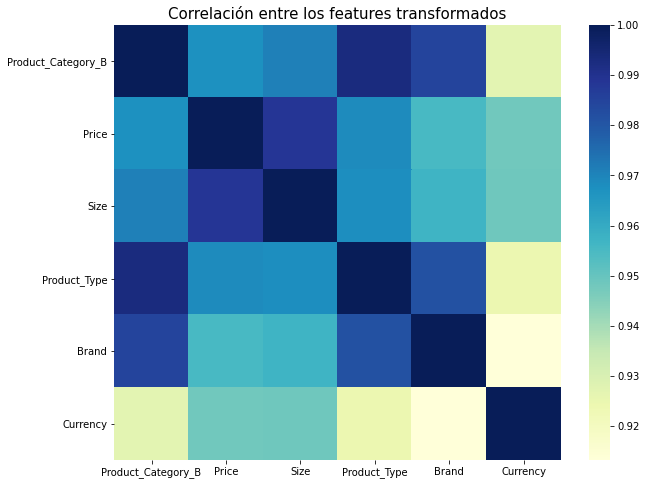

In [5]:
#train = train.drop(columns=['Opportunity_ID', 'Stage'])

corr = data.corr().abs()

fig, ax = plt.subplots(figsize=(10,8))         # Sample figsize in inches
sns.heatmap(corr, cmap='YlGnBu')
ax.set_title('Correlación entre los features transformados', fontsize = 15)

In [6]:
train['And'] = ((train.Product_Category_B)&(train.Price)&(train.Size)|\
                (train.Product_Type)&(train.Brand)&(train.Currency)).astype('int')

In [7]:
ors = train.loc[:, ['Or', 'And', 'Product_Category_B', 'Price', \
              'Size', 'Product_Type', 'Brand', 'Currency', 'Stage', 'Opportunity_ID']]

In [8]:
ors = ors.drop_duplicates(subset='Opportunity_ID')

In [9]:
def data(orr, andd):
    dt = []
    for i in range (len(orr)):
        if orr[i]==andd[i]:
            dt.append('Todos iguales')
        else:
            dt.append('Distintos')
            
    return dt

In [10]:
ors['Visu'] = data(ors.Or.to_list(), ors.And.to_list())

In [11]:
ors.loc[:, ['Or', 'And', 'Visu']]

,Or,And,Visu
0,0,0,Todos iguales
1,0,0,Todos iguales
2,0,0,Todos iguales
3,1,1,Todos iguales
4,1,1,Todos iguales
...,...,...,...
16939,0,0,Todos iguales
16940,0,0,Todos iguales
16942,0,0,Todos iguales
16945,0,0,Todos iguales


In [12]:
visu = ors.groupby('Visu').agg({'Or':'count'}).reset_index()

In [13]:
visu.columns = ['Datos en las columnas', 'Cantidad de oportunidades']

Text(0.5, 1.0, 'Oportunidades con datos iguales')

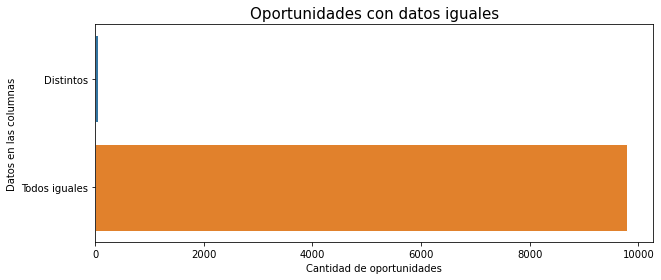

In [14]:
import seaborn as sns

f, ax = plt.subplots(figsize = (10, 4))
sns.barplot(y = 'Datos en las columnas',
            x = 'Cantidad de oportunidades',
            data = visu,
            edgecolor = 'w')

ax.set_title('Oportunidades con datos iguales', fontsize = 15)

In [15]:
final = ors.groupby('Stage').agg({'Or':'value_counts', 'And':'value_counts'})
final

Or   And
Stage Or            
0     0   4086  4144
      1    683   625
1     0   5072  5072

In [16]:
final.columns = ['o', 'a']
final
final = final.reset_index()
final.columns = ['Stage', 'Bool', 'Or', 'And']

In [17]:
final

,Stage,Bool,Or,And
0,0,0,4086,4144
1,0,1,683,625
2,1,0,5072,5072


In [18]:
and_or = pd.DataFrame([['Or', 683],
                       ['And', 625]])

and_or.columns = ['Método usado', 'Cantidad de oportunidades perdidas']

Text(0.5, 1.0, 'Oportunidades perdidas según método usado para juntar las variables')

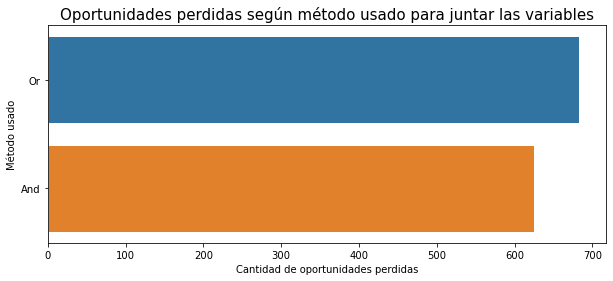

In [19]:
f, ax = plt.subplots(figsize = (10, 4))
sns.barplot(y = 'Método usado',
            x = 'Cantidad de oportunidades perdidas',
            data = and_or,
            edgecolor = 'w')

ax.set_title('Oportunidades perdidas según método usado para juntar las variables', fontsize = 15)

In [20]:
train_set = pd.read_csv('train_prepared.csv', encoding='utf-8')

In [21]:
X = train_set.drop(columns=['Opportunity_ID', 'Target'])

correlation_matrix = X.corr().abs()

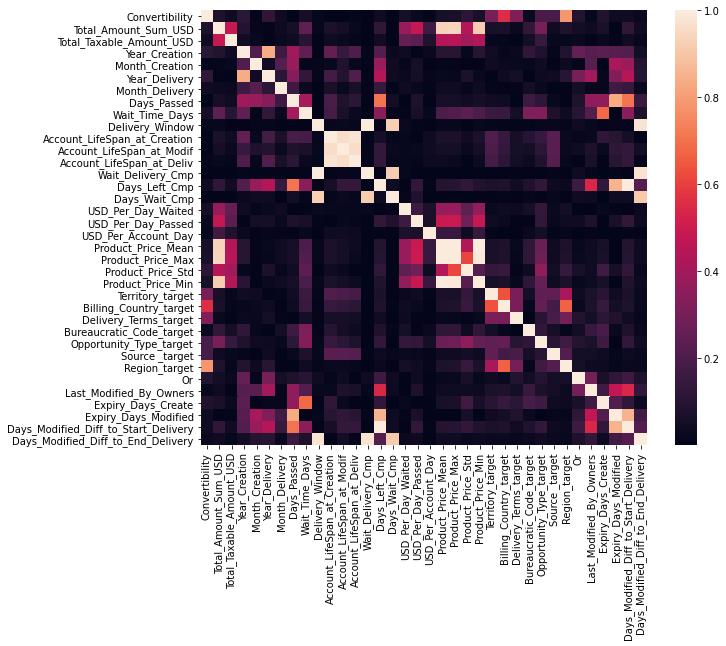

In [22]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,8))         # Sample figsize in inches
sns.heatmap(correlation_matrix, ax=ax)

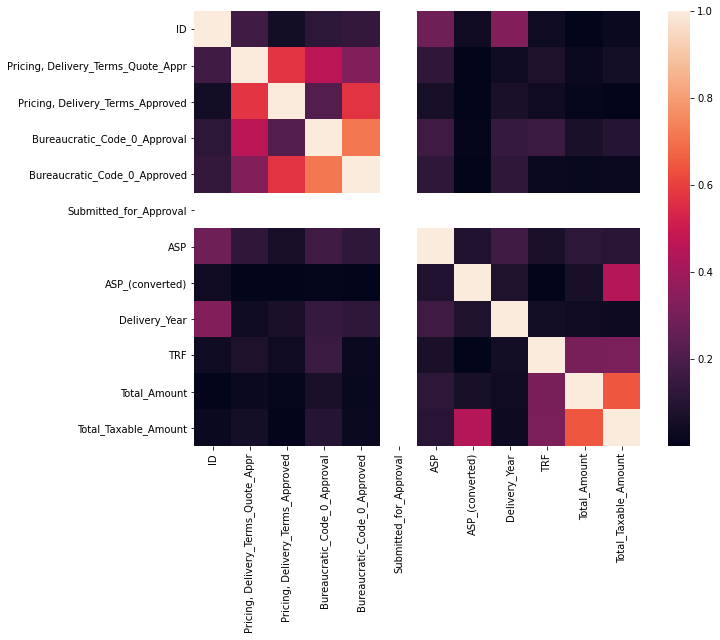

In [23]:
train = pd.read_csv('train.csv', encoding='utf-8')
train = train.drop(columns=['Opportunity_ID', 'Stage'])

corr = train.corr().abs()

fig, ax = plt.subplots(figsize=(10,8))         # Sample figsize in inches
sns.heatmap(corr, ax=ax)

In [24]:
train = pd.read_csv('train.csv', encoding='utf-8')

def sum_strings(t):
    res = ''
    for x in t:
        res = res + x
    return res

train['PNApp'] = train.groupby('Opportunity_ID')['Product_Name'].transform(sum_strings)
train['PFApp'] = train.groupby('Opportunity_ID')['Product_Family'].transform(sum_strings)

In [25]:
train_prods = train.loc[:, ['Opportunity_ID', 'PNApp', 'PFApp']].drop_duplicates(subset='Opportunity_ID')

In [26]:
test = pd.read_csv('test.csv', encoding='utf-8')

test['PNApp'] = test.groupby('Opportunity_ID')['Product_Name'].transform(sum_strings)
test['PFApp'] = test.groupby('Opportunity_ID')['Product_Family'].transform(sum_strings)

In [27]:
test_prods = test.loc[:, ['Opportunity_ID', 'PNApp', 'PFApp']].drop_duplicates(subset='Opportunity_ID')

In [28]:
trainPN = train.PNApp.to_list()
trainPF = train.PFApp.to_list()

In [29]:
test_prods['PNAppInTrain'] = test_prods.PNApp.apply(lambda x: 1 if x in trainPN else 0)

In [30]:
test_prods['PFAppInTrain'] = test_prods.PFApp.apply(lambda x: 1 if x in trainPN else 0)

In [31]:
test_prods

,Opportunity_ID,PNApp,PFApp,PNAppInTrain,PFAppInTrain
0,10689,Product_Name_332Product_Name_315Product_Name_241,Product_Family_171Product_Family_167Product_Fa...,0,0
3,10690,Product_Name_328Product_Name_315Product_Name_2...,Product_Family_171Product_Family_167Product_Fa...,0,0
8,10691,Product_Name_484,Product_Family_223,0,0
9,10692,Product_Name_473Product_Name_473Product_Name_4...,Product_Family_221Product_Family_221Product_Fa...,0,0
15,10693,Product_Name_241,Product_Family_140,1,0
...,...,...,...,...,...
2545,12364,Product_Name_241Product_Name_447,Product_Family_140Product_Family_213,0,0
2547,12365,Product_Name_477,Product_Family_221,1,0
2548,12366,Product_Name_477,Product_Family_221,1,0
2549,12367,Product_Name_281,Product_Family_156,0,0


In [32]:
print(test_prods.PNAppInTrain.sum()/test_prods.PNAppInTrain.count())
test_prods.PFAppInTrain.sum()/test_prods.PFAppInTrain.count()

0.6643267389917039


0.0

In [33]:
print(test_prods.PNAppInTrain.sum())
test_prods.PNAppInTrain.count()

1041


1567

Text(0.5, 1.0, 'Cobertura de combinaciones de Product Name')

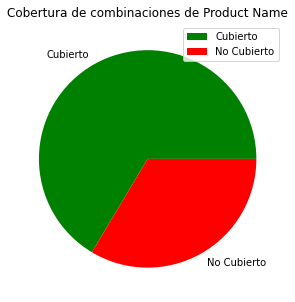

In [34]:
pr = pd.DataFrame({'': [1041, 526]}, \
                  index = ['Cubierto', 'No Cubierto'])

pr.plot.pie(y='', figsize=(5, 5), colors=['green', 'red'])
plt.title('Cobertura de combinaciones de Product Name')

In [35]:
test['PN_in_train'] = (test.Product_Name.apply(lambda x: 1 if x in train.Product_Name.to_list() else 0))

In [36]:
test['PF_in_train'] = (test.Product_Family.apply(lambda x: 1 if x in train.Product_Family.to_list() else 0))

In [37]:
test.loc[:, ['Opportunity_ID', 'PN_in_train', 'PF_in_train']]

,Opportunity_ID,PN_in_train,PF_in_train
0,10689,0,0
1,10689,1,1
2,10689,1,1
3,10690,0,0
4,10690,1,1
...,...,...,...
2546,12364,1,1
2547,12365,1,1
2548,12366,1,1
2549,12367,0,0


In [38]:
def andd(t):
    for x in t:
        if x == 0:
            return 0
    return 1

In [39]:
a = test.groupby('Opportunity_ID').agg({'PN_in_train':andd, 'PF_in_train':andd})
a

,PN_in_train,PF_in_train
Opportunity_ID,,
10689,0,0
10690,0,0
10691,0,1
10692,1,1
10693,1,1
...,...,...
12364,1,1
12365,1,1
12366,1,1


In [40]:
a.PN_in_train.sum()/a.PN_in_train.count()

0.8276962348436503

In [41]:
a.PF_in_train.sum()/a.PF_in_train.count()

0.8915124441608169

In [45]:
pr

,
Cubierto,1041
No Cubierto,526


In [59]:
dic = {'PFInTrain':a.PF_in_train.sum(), 
       'PFTotal': a.PF_in_train.count(), 
       'PNInTrain': a.PN_in_train.sum(), 
       'PNTotal': a.PN_in_train.count()}

products = pd.DataFrame({'InTrain':[a.PF_in_train.sum(), a.PN_in_train.sum()], 
       'Total': [a.PF_in_train.count(), a.PN_in_train.count()]}, index = ['Product Family', 'Product Name']).reset_index()

products

,index,InTrain,Total
0,Product Family,1397,1567
1,Product Name,1297,1567


In [49]:
opp = test.drop_duplicates(subset='Opportunity_ID').copy()
opp

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Prod_Category_A,PNApp,PFApp,PN_in_train,PF_in_train
0,6140,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,7/5/2017,...,0,EUR,162240.0,EUR,367419.0,Prod_Category_A_None,Product_Name_332Product_Name_315Product_Name_241,Product_Family_171Product_Family_167Product_Fa...,0,0
3,6118,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,7/5/2017,...,1,EUR,243360.0,EUR,757783.5,Prod_Category_A_None,Product_Name_328Product_Name_315Product_Name_2...,Product_Family_171Product_Family_167Product_Fa...,0,0
8,11530,Americas,NE America,1,1,0,0,0,Bureaucratic_Code_4,2/16/2019,...,0,USD,21037.5,USD,21037.5,Prod_Category_A_None,Product_Name_484,Product_Family_223,0,1
9,20314,Americas,NW America,1,1,1,0,0,Bureaucratic_Code_2,7/27/2013,...,1,USD,342490.5,USD,2169106.5,Prod_Category_A_None,Product_Name_473Product_Name_473Product_Name_4...,Product_Family_221Product_Family_221Product_Fa...,1,1
15,7374,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,8/30/2018,...,0,USD,5752.5,USD,5752.5,Prod_Category_A_None,Product_Name_241,Product_Family_140,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,16339,EMEA,KSA,1,1,0,0,0,Bureaucratic_Code_4,6/12/2017,...,0,USD,23010.0,USD,147750.0,Prod_Category_A_None,Product_Name_241Product_Name_447,Product_Family_140Product_Family_213,1,1
2547,15218,Americas,SE America,1,1,0,0,0,Bureaucratic_Code_4,6/8/2018,...,0,USD,45054.9,USD,45054.9,Prod_Category_A_None,Product_Name_477,Product_Family_221,1,1
2548,15224,Americas,SE America,1,1,1,1,0,Bureaucratic_Code_4,6/8/2018,...,0,USD,100122.0,USD,100122.0,Prod_Category_A_None,Product_Name_477,Product_Family_221,1,1
2549,7286,Americas,NE America,1,1,0,0,0,Bureaucratic_Code_4,8/29/2018,...,0,USD,143220.0,USD,143220.0,Prod_Category_A_None,Product_Name_281,Product_Family_156,0,0


In [50]:
opp['ANInTrain'] = (opp.Account_Name.apply(lambda x: 1 if x in train.Account_Name.to_list() else 0))
opp['AOInTrain'] = (opp.Account_Owner.apply(lambda x: 1 if x in train.Account_Owner.to_list() else 0))
opp['OOInTrain'] = (opp.Opportunity_Owner.apply(lambda x: 1 if x in train.Opportunity_Owner.to_list() else 0))
opp.loc[:, ['ANInTrain', 'AOInTrain', 'OOInTrain']]

,ANInTrain,AOInTrain,OOInTrain
0,1,1,1
3,1,1,1
8,0,1,0
9,1,1,1
15,1,1,1
...,...,...,...
2545,1,1,1
2547,1,1,1
2548,1,1,1
2549,0,1,0


In [76]:
owners = pd.DataFrame({'InTrain': [opp.ANInTrain.sum(), opp.AOInTrain.sum(), opp.OOInTrain.sum()],
         'Total': [opp.ANInTrain.count(), opp.AOInTrain.sum(), 1567]}, 
            index = ['Account Name', 'Account Owner', 'Opportunity Owner']).reset_index()

In [77]:
total = owners.append(products)

In [78]:
total

,index,InTrain,Total
0,Account Name,1198,1567
1,Account Owner,1567,1567
2,Opportunity Owner,1377,1567
0,Product Family,1397,1567
1,Product Name,1297,1567


In [1]:
import seaborn as sns

f, ax = plt.subplots(figsize = (10, 4))

sns.barplot(x = 'Total',
            y = 'index',
            data = total,
            label = 'Datos no presentes en train',
            color = 'red',
            edgecolor = 'w')

sns.barplot(x = 'InTrain',
            y = 'index',
            data = total,
            label = 'Datos presentes en train',
            color = 'green',
            edgecolor = 'w')

sns.set_color_codes('muted')

ax.set_title('Comparando los datos de test presentes en train', fontsize = 15)
ax.set_ylabel('', fontsize = 12)
ax.set_xlabel('Cantidad de datos', fontsize = 12)
ax.legend(fontsize=12)
#sns.despine(left = True, bottom = True)
plt.legend(bbox_to_anchor=(1.01, 0.98),  borderaxespad=0.)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=7)
plt.show()

NameError: name 'plt' is not defined